<style>
div.cell, div.text_cell_render{
  max-width:750px;
  margin-left:auto;
  margin-right:auto;
}

.rendered_html
{
  font-size: 140%;
  }

.rendered_html li
{
  line-height: 1.8;
  }

.rendered_html h1, h2 {
  text-align:center;
  font-familly:"Charis SIL", serif;
}

.input_prompt, .CodeMirror-lines, .output_area
{
  font-family: Consolas;
  font-size: 110%;
  }
</style>

<small><i>This notebook was put together by [Jake Vanderplas](http://www.vanderplas.com) for UW's [Astro 599](http://www.astro.washington.edu/users/vanderplas/Astr599/) course. Source and license info is on [GitHub](https://github.com/jakevdp/2013_fall_ASTR599/).</i></small>

# Introduction to matplotlib

The [matplotlib](http://matplotlib.org) library is a powerful tool capable of producing complex publication-quality figures with fine layout control in two and three dimensions; here we will only provide a minimal self-contained introduction to its usage that covers the functionality needed for the rest of the book.  We encourage the reader to read the tutorials included with the matplotlib documentation as well as to browse its extensive gallery of examples that include source code.

Just as we typically use the shorthand `np` for Numpy, we will use `plt` for the `matplotlib.pyplot` module where the easy-to-use plotting functions reside **(the library contains a rich object-oriented architecture that we don't have the space to discuss here)**:

In [5]:
!export LC_ALL=en_US.UTF-8
!export LANG=en_US.UTF-8

In [3]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### The `plot` command:

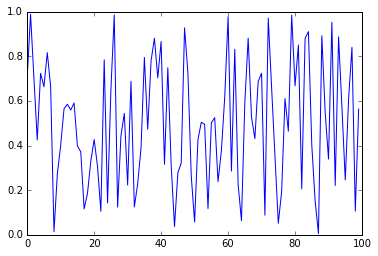

In [3]:
plt.plot(np.random.rand(100))

### Plotting a function: $f(x) = \sin(x)$

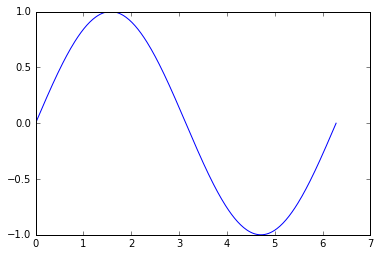

In [5]:
x = np.linspace(0, 2*np.pi, 300)
y = np.sin(x)
plt.plot(x, y)

### Titles, labels, etc.

The most frequently used function is simply called `plot`, here is how you can make a simple plot of $\sin(x)$ and $\sin(x^2)$ for $x \in [0, 2\pi]$ with labels and a grid (we use the semicolon in the last line to suppress the display of some information that is unnecessary right now):

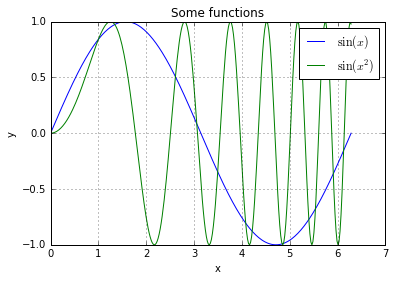

In [6]:
y2 = np.sin(x**2)
plt.plot(x, y, label=r'$\sin(x)$')
plt.plot(x, y2, label=r'$\sin(x^2)$')
plt.title('Some functions')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend();  ## Find out how to get a non-overlapping legend ??

### Controlling lines and markers

You can control the style, color and other properties of the markers, for example:

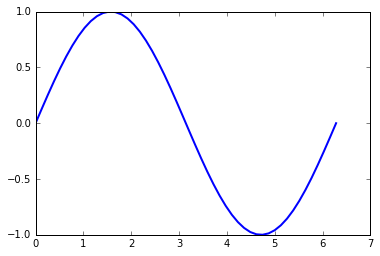

In [13]:
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)
plt.plot(x, y, linewidth=2);

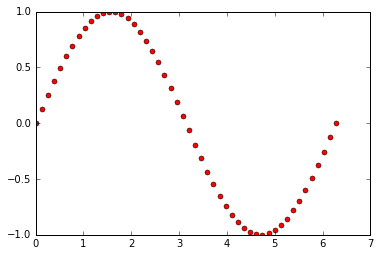

In [23]:
plt.plot(x, y, 'o', markersize=5, color='r');

## Other plot types

### Errorbars

We will now see how to create a few other common plot types, such as a simple error plot:

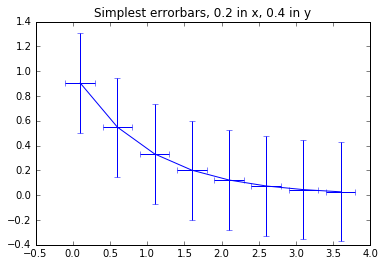

In [11]:
# example data
import numpy as np
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example variable error bar values
yerr = 0.1 + 0.2*np.sqrt(x)
xerr = 0.1 + yerr

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x, y, xerr=0.2, yerr=0.4)  ## You can define error bars as an array.
plt.title("Simplest errorbars, 0.2 in x, 0.4 in y");

### Log plot

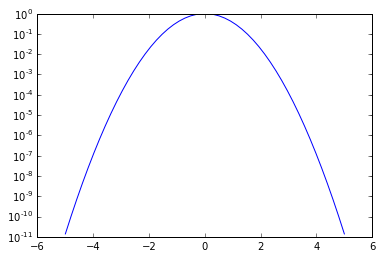

In [15]:
x = np.linspace(-5, 5)
y = np.exp(-x**2)
plt.semilogy(x, y);

### Histogram

A histogram annotated with text inside the plot, using the `text` function:

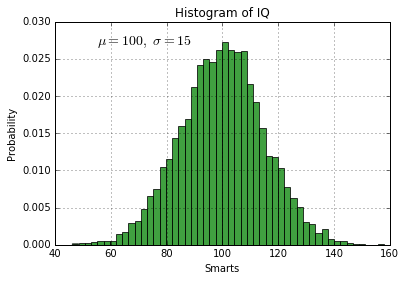

In [23]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)

plt.hist?
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
# This will put a text fragment at the position given:
plt.text(55, .027, r'$\mu=100,\ \sigma=15$', fontsize=14)
plt.axis([40, 160, 0, 0.03])
plt.grid(True)  #NICE

### Plotting two-dimensional arrays

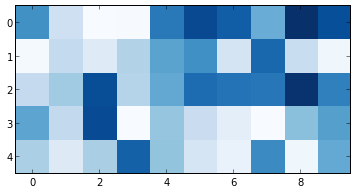

In [10]:
plt.imshow(rand(5,10), interpolation='nearest', cmap=cm.Blues)

In [26]:
img = plt.imread('images/dessert.png')   #plt has special functions to read and show images. 
img.shape

(500, 319, 3)

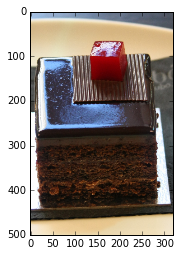

In [25]:
plt.imshow(img)

### Subplots
Plot the r, g, b channels of the image.

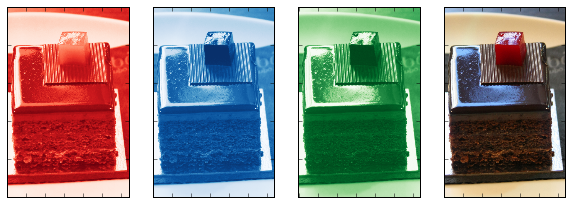

In [34]:
fig, ax = plt.subplots(1,4, figsize=(10,6))
ax[0].imshow(img[:,:,0], cmap=cm.Reds_r)
ax[1].imshow(img[:,:,1], cmap=cm.Blues_r)
ax[2].imshow(img[:,:,2], cmap=cm.Greens_r)
ax[3].imshow(img);
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])

## Simple 3d plotting with matplotlib
For 3D plots, you must execute at least once in your session:

In [35]:
from mpl_toolkits.mplot3d import Axes3D

One this has been done, you can create 3d axes with the `projection='3d'` keyword to `add_subplot`:

    fig = plt.figure()
    fig.add_subplot(...,
                    projection='3d')

Here is a simple 3D surface plot:

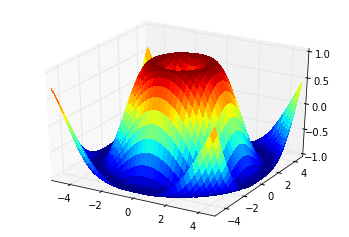

In [15]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet,
        linewidth=0, antialiased=False)
ax.set_zlim3d(-1.01, 1.01);

## The [matplotlib gallery](http://matplotlib.sourceforge.net/gallery.html)

You can load code from the gallery using the URL, and then try it out:

In [16]:
%load http://matplotlib.org/mpl_examples/pie_and_polar_charts/polar_scatter_demo.py

# Breakout: Image denoising

**Illustrates**: 2-d image denoising, use of the numpy FFT library, array
manipulations, image plotting.

Let's try to denoise the following image with naive numpy manipulations:

<center>
<img src="files/images/moonlanding.png" width="300px"/>
</center>

The convolution of an input with with a linear filter in the termporal or
spatial domain is equivalent to multiplication by the Fourier transforms of the
input and the filter in the spectral domain.  This provides a conceptually
simple way to think about filtering: transform your signal into the frequency
domain, dampen the frequencies you are not interested in by multiplying the
frequency spectrum by the desired weights, and then apply the inverse transform
to the modified spectrum, back into the original domain.  In the example below,
we will simply set the weights of the frequencies we are uninterested in (the
high frequency noise) to zero rather than dampening them with a smoothly
varying function.  Although this is not usually the best thing to do, since
sharp edges in one domain usually introduce artifacts in another (eg high
frequency "ringing"), it is easy to do and sometimes provides satisfactory
results.

<center>
<img src="files/images/moon_denoise.png" width="600px">
</center>

High frequency noise filtering of a 2D image in the Fourier domain.  The upper panels show the original image (left) and spectral power (right) and    the lower panels show the same data with the high frequency power set to    zero.  Although the input and output images are grayscale, you can provide    colormaps to `imshow` to plot them in pseudo-color, with the `cmap` argument to `imshow`, which accepts any of the colormaps found in the `matplotlib.cm` module.

## Exercise

After reading the image file ``moonlanding.png``, try to produce images like
the ones in the figure.  We will describe the process here and provide some
hints as to what you need to think about.
   
The image in the upper left panel of the Figure is a grayscale photo of the
moon landing.  There is a banded pattern of high frequency noise polluting the
image.  In the upper right panel we see the 2D spatial frequency spectrum.  The
FFT output in the ``numpy.fft`` module is packed with the lower freqeuencies
starting in the upper left, and proceeding to higher frequencies as one moves
to the center of the spectrum (this is the most efficient way numerically to
fill the output of the FFT algorithm).  Because the input signal is real, the
output spectrum is complex and symmetrical: the transformation values beyond
the midpoint of the frequency spectrum (the Nyquist frequency) correspond to
the values for negative frequencies and are simply the mirror image of the
positive frequencies below the Nyquist (this is true for the 1D, 2D and ND FFTs
in ``numpy``).

You should compute the 2D spatial frequency spectra of the luminance image,
zero out the high frequency components, and inverse transform back into the
spatial domain.  You can plot the input and output images with
``plt.imshow``, but you should observe that if you show the power spectrum
(the absolute value of the FFT) directly, you will only see white, and not the
image in the Figure's upper right panel.  This is due to the fact that the
power spectrum has a small number of pixels with extremely high amplitude,
which completely swamp the contrast (you can verify this by playing with a
histogram of the data).

In [ ]:
%pylab inline

import sys
import numpy as np
from matplotlib import pyplot as plt

Here's a handy utility for you that normalizes the peaks in the spectrum so the huge dynamic range in this image doesn't swamp the plot. You can take this as a given.

In [ ]:
def plot_spectrum(F, amplify=1000, ax=None):
    """Normalise, amplify and plot an amplitude spectrum."""

    # Note: the problem here is that we have a spectrum whose histogram is
    # *very* sharply peaked at small values.  To get a meaningful display, a
    # simple strategy to improve the display quality consists of simply
    # amplifying the values in the array and then clipping.

    # Compute the magnitude of the input F (call it mag).  Then, rescale mag by
    # amplify/maximum_of_mag.
    mag = abs(F) 
    mag *= amplify/mag.max() 
    
    # Next, clip all values larger than one to one.
    mag[mag > 1] = 1 

    if ax is None: ax = plt.gca()
    ax.imshow(mag, plt.cm.Blues)

Read in original image, convert to floating point for further
manipulation; imread returns a MxNx4 RGBA image.  Since the image is
grayscale, just extract the 1st channel

**Hints:**

* use `plt.imread()` to load the file
* convert to a float array with the `.astype()` method
* extract all rows, all columns, 0-th plane to get the first channel
* the resulting array should have 2 dimensions only

(The image used below is in the github repository: i.e. a notebook downloaded
from the webpage will not have the image available)

In [ ]:
fname = 'images/moonlanding.png'
# your code here, you should get this image shape when done:
# Image shape: (474, 630)

Compute the 2d FFT of the input image, look at the center of the spectrum, and simply truncate everything but the corners to zero.

**Hints:** 

* Look for a 2-d FFT in `np.fft`.

* Call this variable 'F', which is the name we'll be using below.

* In the lines following, we'll make a copy of the original spectrum and truncate coefficients.  

* In the lines following, we'll make a copy of the original spectrum and truncate coefficients. 

* In Python, a complex number `z` has `z.real` and `z.imag` attributes for its real and imaginary parts.  

In [ ]:
# Assign the 2d FFT to `F`
#...

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform.  Numpy arrays have a copy
# method for this purpose.
# ...

# Set r and c to be the number of rows and columns of the array.
# ....

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
#... 

# Similarly with the columns:
#... 

Reconstruct the denoised image from the filtered spectrum, keep only the
real part for display.
Hint: There's an inverse 2d fft in the np.fft module as well (don't
forget that you only want the real part).
Call the result im_new and plot the results

In [ ]:
# im_new =   # new image here, from inverse FFT of truncated data

# Now, create the plots and display
fig, ax = plt.subplots(2, 2, figsize=(10,7))

ax[0,0].set_title('Original image')
ax[0,0].imshow(im, plt.cm.gray)

ax[0,1].set_title('Fourier transform')
plot_spectrum(F, ax=ax[0,1])

ax[1,1].set_title('Filtered Spectrum')
plot_spectrum(ff, ax=ax[1,1])

ax[1,0].set_title('Reconstructed Image')
ax[1,0].imshow(im_new, plt.cm.gray);